# LendingClub Dataset - Neural Network Classification Project

#### Loading feature information and creating feat_info function for description

In [3]:
import pandas as pd

In [4]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


#### Importing Libraries and Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Exploratory Data Analysis

#### Understanding Variables and visualizing Data

<Axes: xlabel='loan_status', ylabel='count'>

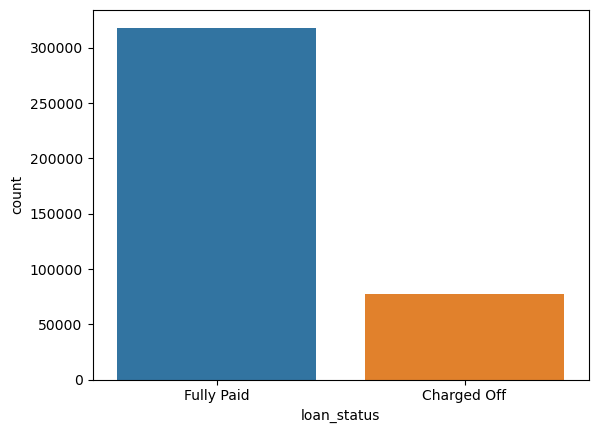

In [13]:
sns.countplot(x='loan_status',data=df)

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_amnt', ylabel='Count'>

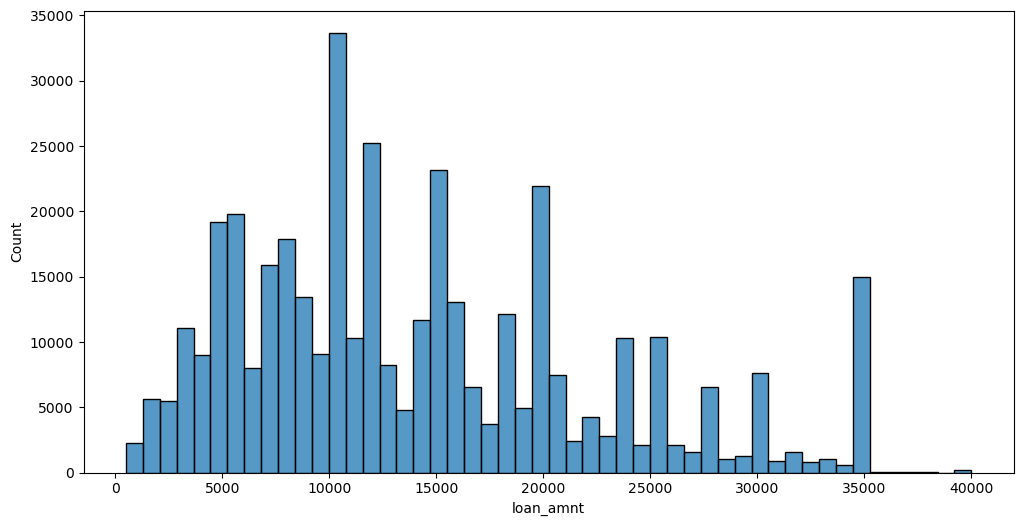

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='loan_amnt',bins=50)

In [15]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

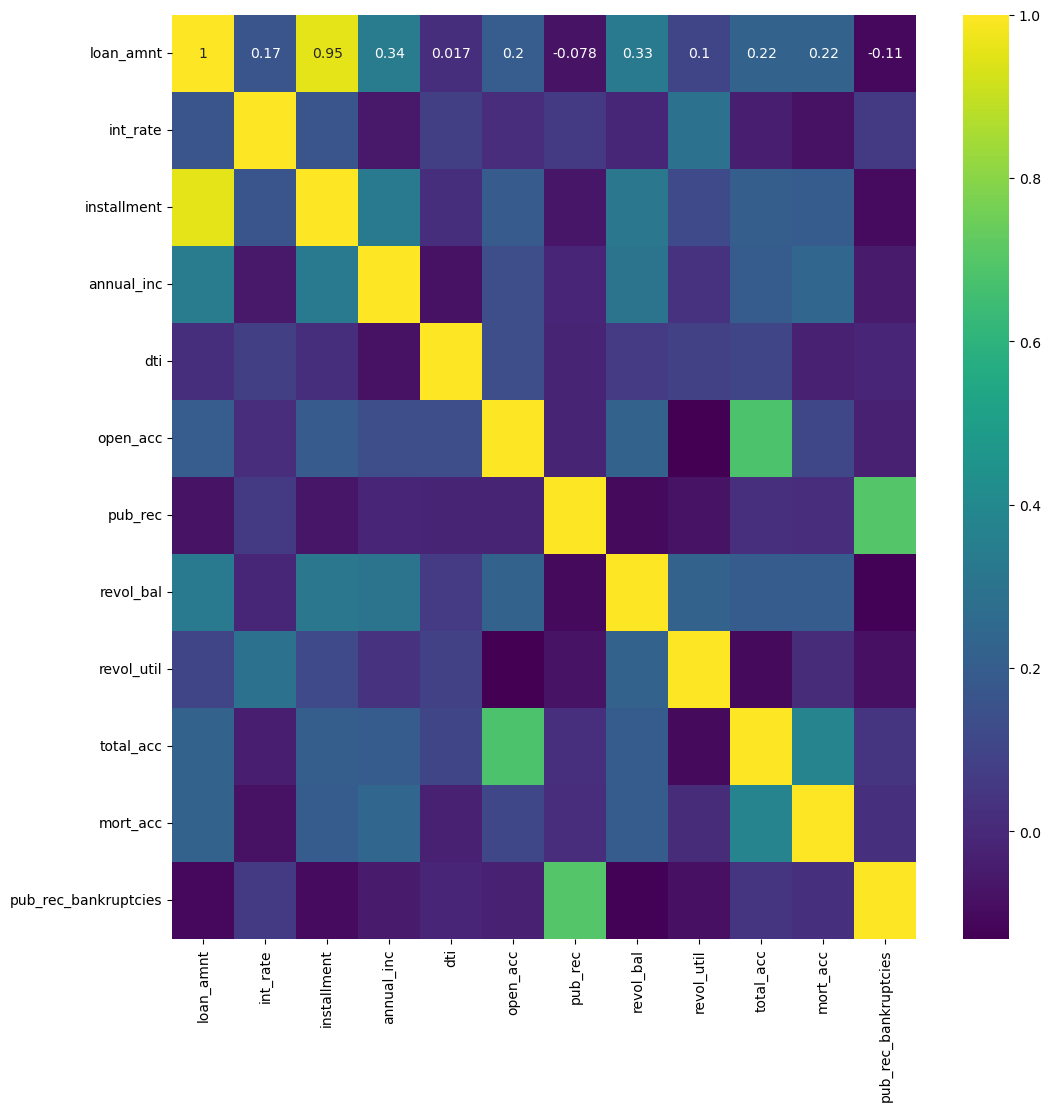

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [17]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

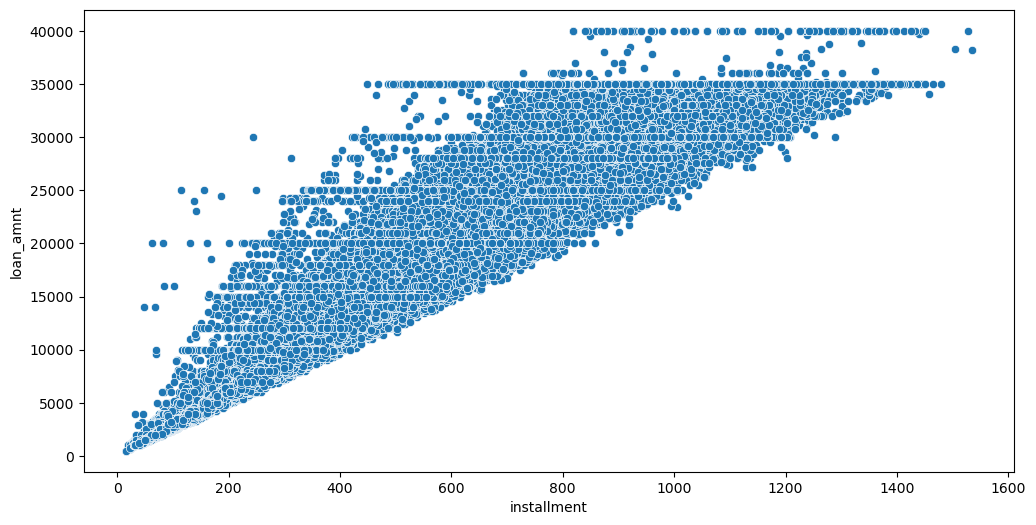

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

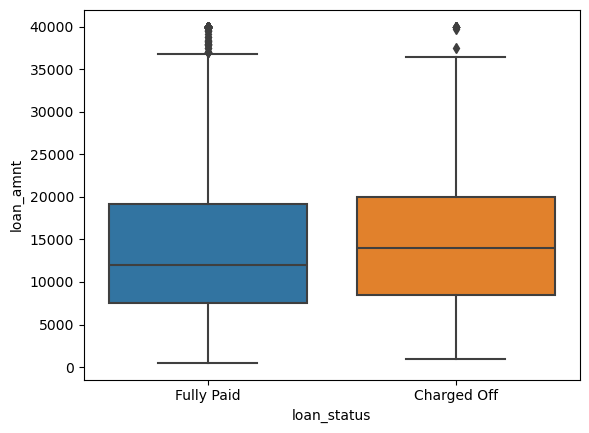

In [20]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [21]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Plotting with Grades and Sub-grades

In [23]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [24]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

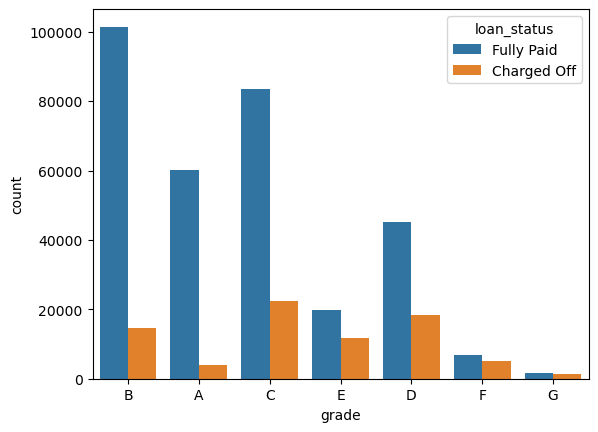

In [25]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

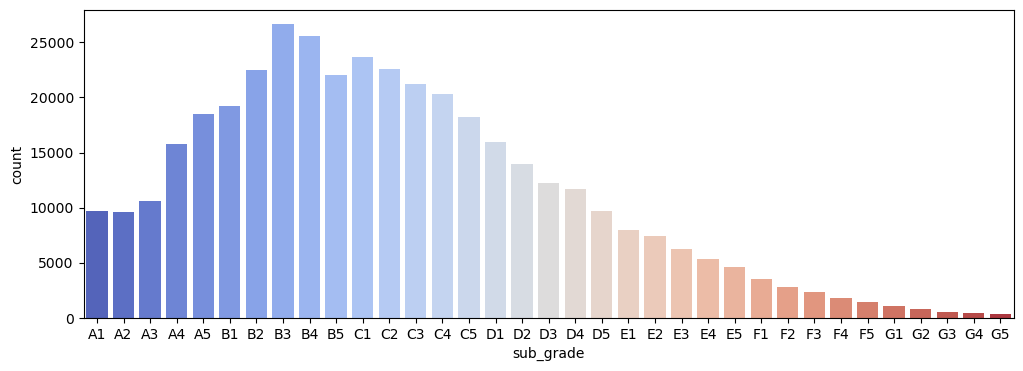

In [26]:
plt.figure(figsize=(12,4))
ssg = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=ssg,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

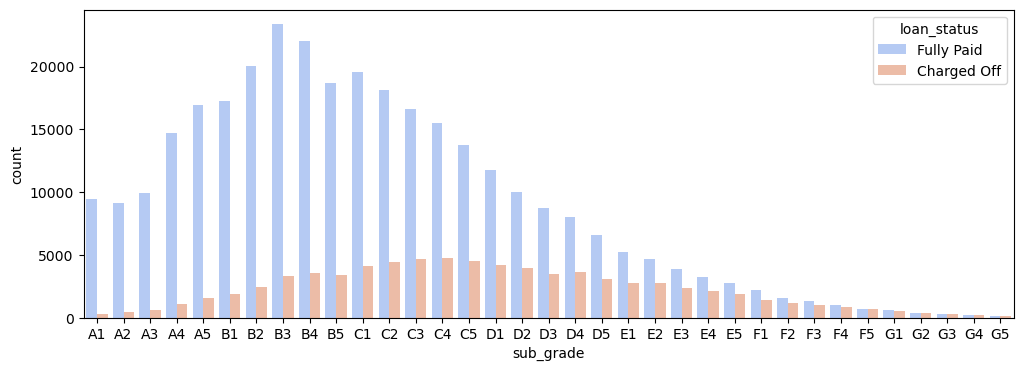

In [27]:
plt.figure(figsize=(12,4))
ssg = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=ssg,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

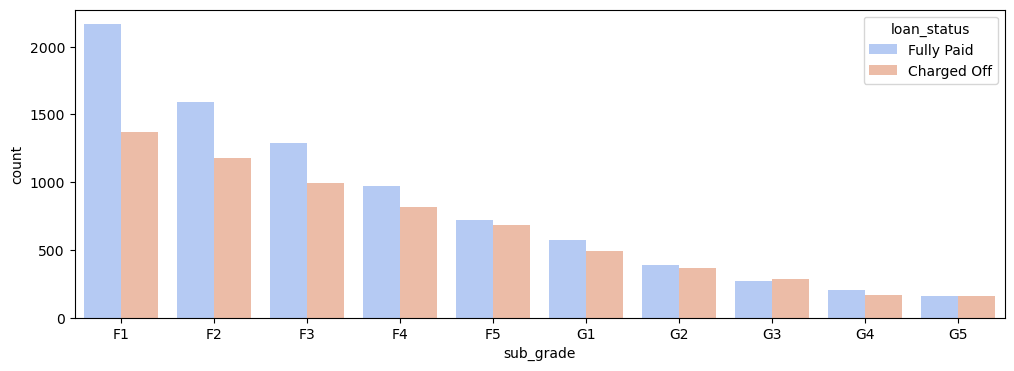

In [28]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(12,4))
ssg = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,hue='loan_status',order=ssg,palette='coolwarm')

#### Create load_repaid column with binary values

In [30]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [31]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [32]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

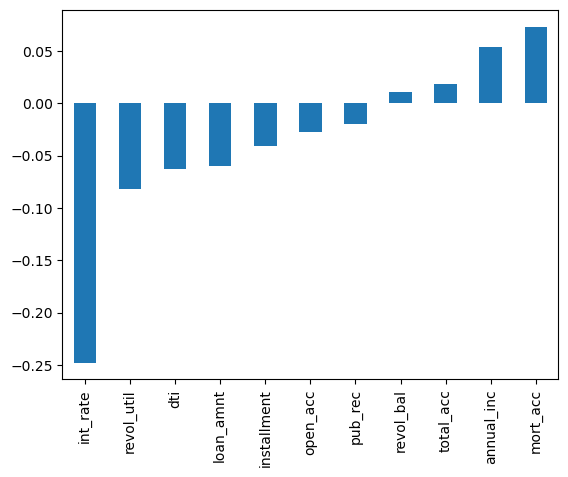

In [33]:
df.corr(numeric_only=True)['loan_repaid'][:-2].sort_values().plot(kind='bar')

# Data PreProcessing

In [35]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data

In [37]:
len(df)

396030

In [38]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [39]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [40]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [41]:
df['emp_title'].nunique()

173105

In [42]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

#### Too many unique job titles to try to convert to a dummy variable feature

In [44]:
df.drop('emp_title',axis=1,inplace=True)

In [45]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [46]:
em_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',]

<Axes: xlabel='emp_length', ylabel='count'>

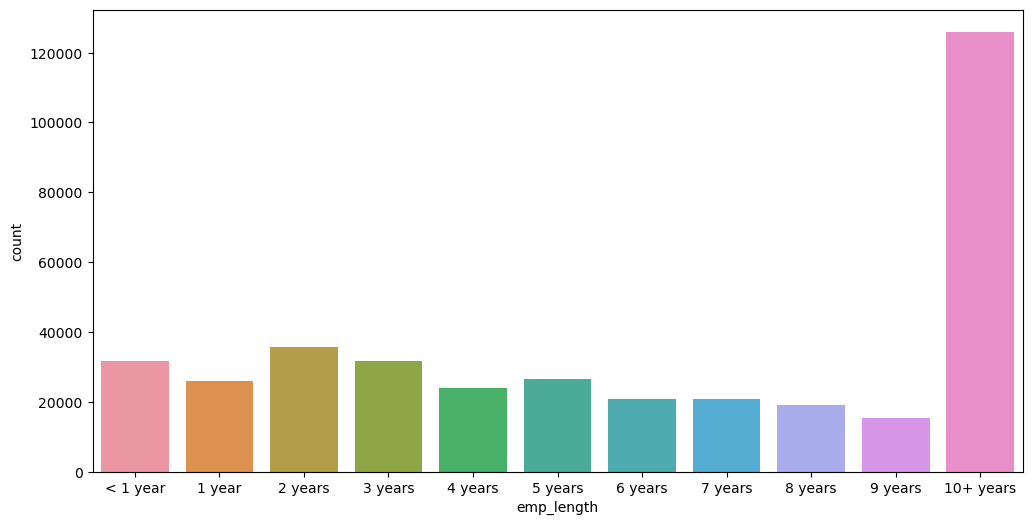

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=em_order)

<Axes: xlabel='emp_length', ylabel='count'>

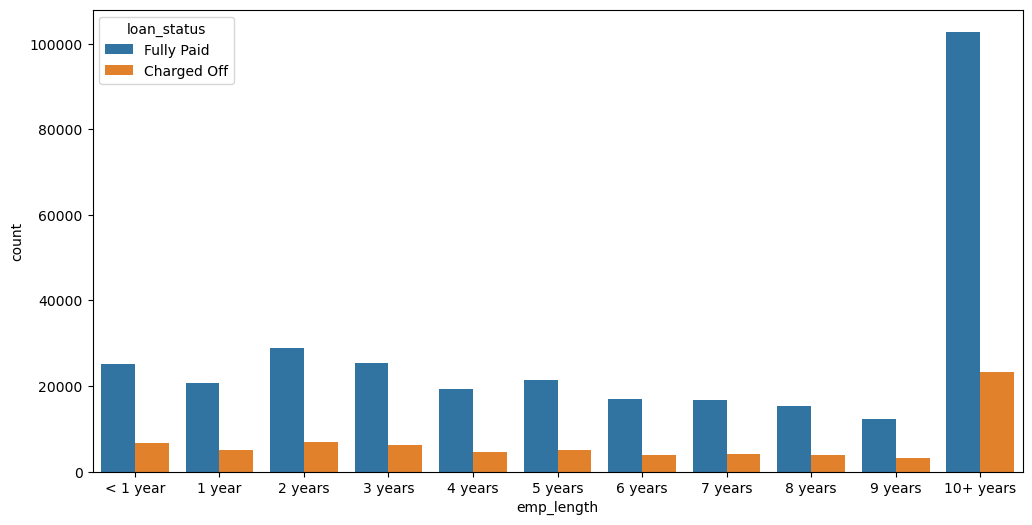

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=em_order,hue='loan_status')

In [49]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [50]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [51]:
emp_len = emp_co/emp_fp

In [52]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

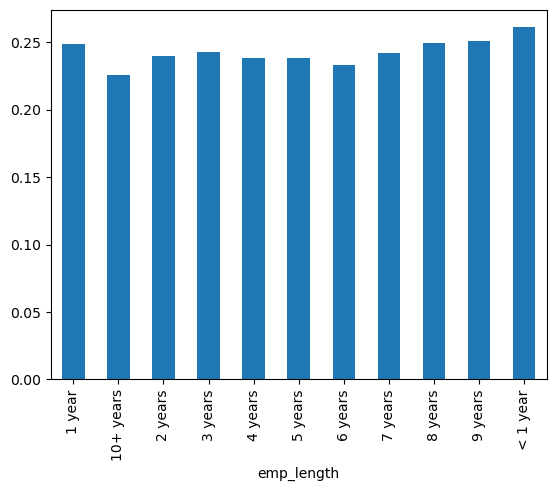

In [53]:
emp_len.plot(kind='bar')

In [54]:
df.drop('emp_length',axis=1,inplace=True)

In [55]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [56]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [57]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [58]:
df.drop('title',axis=1,inplace=True)

#### Replacing mort_acc values with average of next correlated column values

In [60]:
feat_info('mort_acc')

Number of mortgage accounts.


In [61]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [62]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [63]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [64]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [65]:
total_acc_avg[2.0]

0.0

In [66]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [67]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [68]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [69]:
df = df.dropna()

In [70]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables

In [72]:
df.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [73]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [74]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

#### Grade feature

In [76]:
df.drop('grade',axis=1,inplace=True)

In [77]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [78]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [79]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [80]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### verification_status, application_type,initial_list_status,purpose 

In [82]:
extra_dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,extra_dummies],axis=1)

In [83]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

#### home_ownership

In [85]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [86]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [87]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [88]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

#### issue_d 

In [90]:
df = df.drop('issue_d',axis=1)

#### earliest_cr_line

In [92]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [93]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
df.drop('loan_status',axis=1,inplace=True)

In [97]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test = scaler.transform(X_test)

# Creating the Model

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

## Sequential model: 78 -> 39 -> 19 -> 1

In [107]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy' )

In [108]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/25

1236/1236 [==============================] - 5s 3ms/step - loss: 0.2978 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2654 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2632 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2618 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2609 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2604 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2592 - val_loss: 0.2619
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.25

In [109]:
from tensorflow.keras.models import load_model

In [110]:
model.save('TensorFlow Classifcation Model')

INFO:tensorflow:Assets written to: TensorFlow Classifcation Model\assets


INFO:tensorflow:Assets written to: TensorFlow Classifcation Model\assets


# Evaluating Model Performance.

In [112]:
validation_loss = pd.DataFrame(model.history.history)

<Axes: >

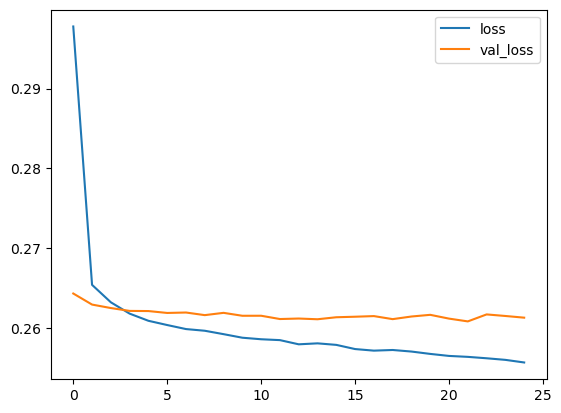

In [113]:
validation_loss.plot()

In [114]:
x = model.predict(X_test)
x

2471/2471 [==============================] - 5s 2ms/step


array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [8.827991e-01],
       [1.000000e+00],
       [7.052114e-22]], dtype=float32)

In [115]:
predictions = (x>0.5).astype('int32')

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6809  8849]
 [   75 63311]]


#### Random Testing

In [119]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [120]:
import numpy as np

if new_customer.isnull().values.any():
    new_customer = new_customer.fillna(0) 

new_customer = new_customer.astype(np.float64)

predictions = model.predict(new_customer.values.reshape(1, 78))
predictions

1/1 [==============================] - 0s 59ms/step


array([[1.]], dtype=float32)

In [121]:
df.iloc[random_ind]['loan_repaid']

1